Install Required Libraries

In [7]:
%pip install matplotlib seaborn scikit-learn pandas numpy joblib streamlit

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.9-cp313-cp313-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-11.3.0-cp313-cp313-win_amd64.whl.metadata (9.2 kB)
  Using cached altair-5.5.0-py3-none-any.whl.metadata (11 kB)
  Using cached blinker-1.9.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached pyarrow-21.0.0-cp313-cp313-win_amd64.whl.metadata (3.4 kB)
  Using cached requests-2.32.5-py3-none-any.whl.metadata (4.9 kB)
  Using cached tenacity-9.1.2-py3-none-any.whl.metadata (1.2 kB)
  Using cached toml-0.10.2-py2.py3-none-any.whl.metadata (7.1 kB)
  Using cached watchdog-6.0.0-py3-none-win_amd64.whl.metadata (44 kB)
  Using cached gitpython-3.1.45-py3-none-any.whl.metadata (13 kB)
  Using cached pydeck-0.9.1-py2.py3-none-any.whl.metadata (4.1 kB)
  Using cached jinja2-3.1.6-py3-none-any.whl.me

Import Libraries

In [15]:
# Basic Libraries
import pandas as pd
import numpy as np
import time

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing & Modeling
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Save Model
import joblib

Load Dataset

In [16]:
# Load dataset
df = pd.read_csv(r"C:\Users\kanis\OneDrive\Desktop\pythonvsworksdir\lux_house\youtube_ad_revenue_dataset.csv")

# Quick Look
df

,video_id,date,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,category,device,country,ad_revenue_usd
0,vid_3092,2024-09-24 10:50:40.993199,9936,1221.0,320.0,26497.214184,2.862137,228086,Entertainment,TV,IN,203.178237
1,vid_3459,2024-09-22 10:50:40.993199,10017,642.0,346.0,15209.747445,23.738069,736015,Gaming,Tablet,CA,140.880508
2,vid_4784,2024-11-21 10:50:40.993199,10097,1979.0,187.0,57332.658498,26.200634,240534,Education,TV,CA,360.134008
3,vid_4078,2025-01-28 10:50:40.993199,10034,1191.0,242.0,31334.517771,11.770340,434482,Entertainment,Mobile,UK,224.638261
4,vid_3522,2025-04-28 10:50:40.993199,9889,1858.0,477.0,15665.666434,6.635854,42030,Education,Mobile,CA,165.514388
...,...,...,...,...,...,...,...,...,...,...,...,...
122395,vid_2902,2024-12-14 10:50:40.993199,9853,1673.0,147.0,42075.704885,25.490195,210818,Education,Tablet,US,280.986396
122396,vid_3890,2024-07-13 10:50:40.993199,10128,1709.0,63.0,57563.703040,16.229133,878860,Music,Desktop,UK,354.612981
122397,vid_3934,2024-06-10 10:50:40.993199,10267,700.0,NaN,27549.714659,23.822365,576756,Tech,Tablet,CA,203.643106
122398,vid_4260,2024-12-22 10:50:40.993199,10240,1616.0,106.0,56967.384382,7.753099,585138,Music,Mobile,UK,351.525811


Data Inspection & Cleaning

In [17]:
df.columns

Index(['video_id', 'date', 'views', 'likes', 'comments', 'watch_time_minutes',
       'video_length_minutes', 'subscribers', 'category', 'device', 'country',
       'ad_revenue_usd'],
      dtype='object')

In [18]:
# Check info & missing values
df.info()
df.isna().sum()

# Handle missing values (median imputation)
for col in ['likes','comments','watch_time_minutes']:
    df[col]=df[col].fillna(df[col].median())

# Remove duplicates
df=df.drop_duplicates()

print("After cleaning:", df.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122400 entries, 0 to 122399
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   video_id              122400 non-null  object 
 1   date                  122400 non-null  object 
 2   views                 122400 non-null  int64  
 3   likes                 116283 non-null  float64
 4   comments              116288 non-null  float64
 5   watch_time_minutes    116295 non-null  float64
 6   video_length_minutes  122400 non-null  float64
 7   subscribers           122400 non-null  int64  
 8   category              122400 non-null  object 
 9   device                122400 non-null  object 
 10  country               122400 non-null  object 
 11  ad_revenue_usd        122400 non-null  float64
dtypes: float64(5), int64(2), object(5)
memory usage: 11.2+ MB
After cleaning: (120000, 12)


Feature Engineering

In [19]:
# Engagement rate
df['engagement_rate'] = (df['likes'] + df['comments']) / df['views']

# Revenue per view (for insights)
df['revenue_per_view'] = df['ad_revenue_usd'] / df['views']


C:\Users\kanis\AppData\Local\Temp\ipykernel_200280\2301664110.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['engagement_rate'] = (df['likes'] + df['comments']) / df['views']
C:\Users\kanis\AppData\Local\Temp\ipykernel_200280\2301664110.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['revenue_per_view'] = df['ad_revenue_usd'] / df['views']


Exploratory Data Analysis(EDA)

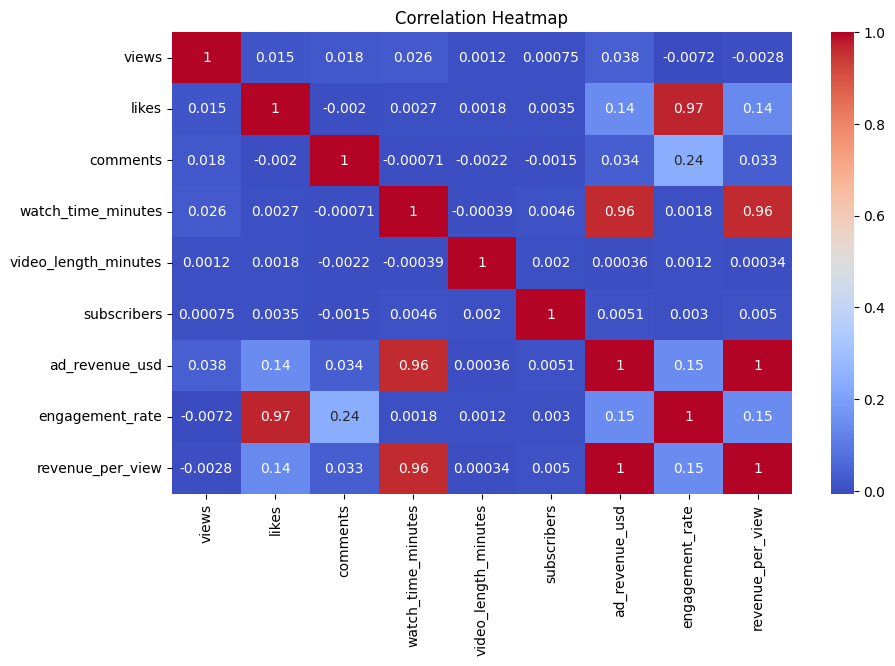

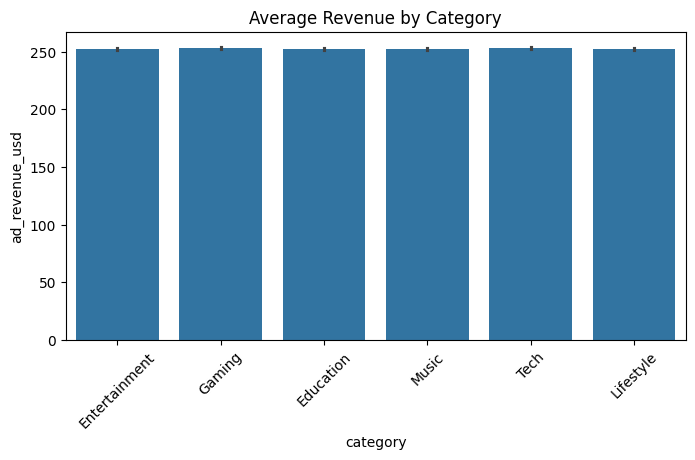

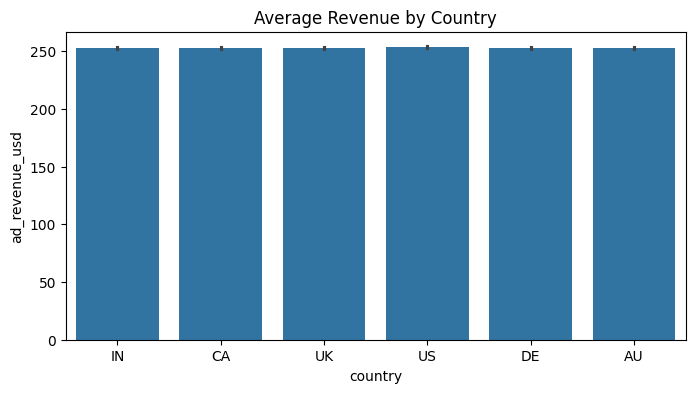

                      Skewness  Kurtosis
comments              0.008859 -1.098689
watch_time_minutes    0.001674 -1.100090
ad_revenue_usd        0.000948 -1.140445
revenue_per_view     -0.001713 -1.145053
video_length_minutes -0.001861 -1.202837
views                -0.002912  0.015718
likes                -0.003271 -1.101797
engagement_rate      -0.006607 -0.981006
subscribers          -0.009575 -1.197619


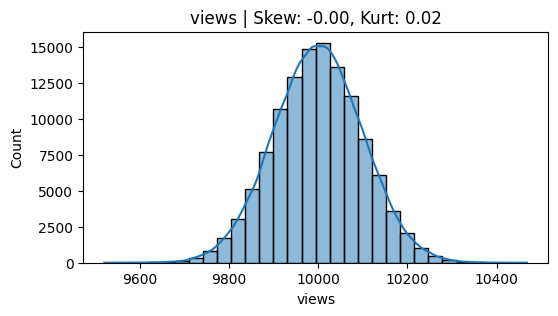

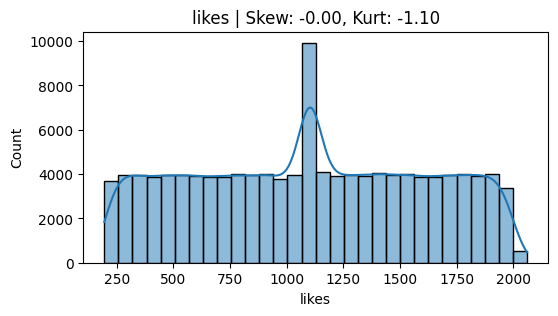

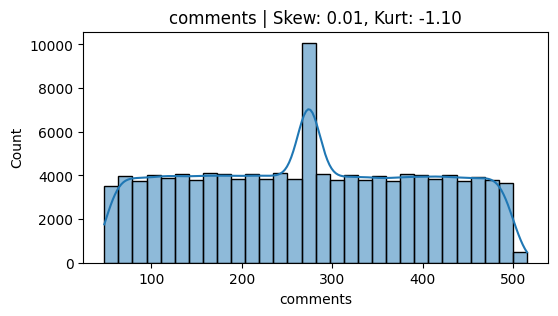

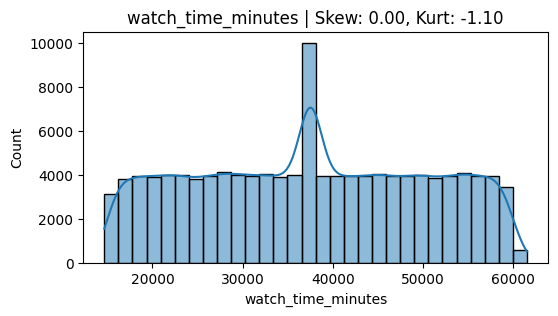

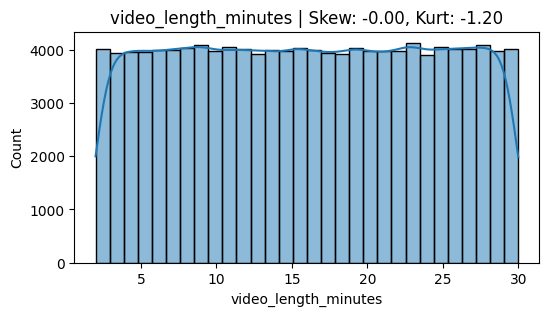

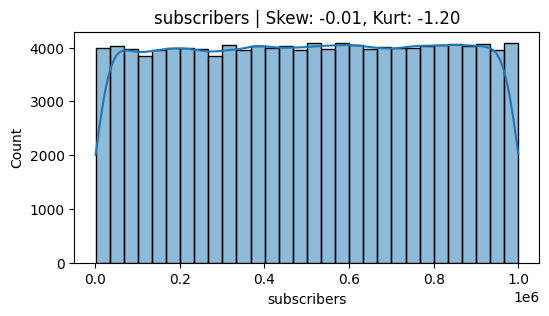

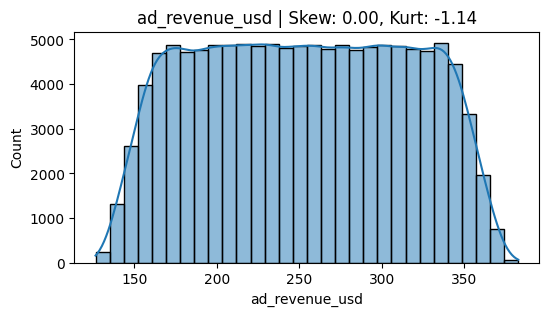

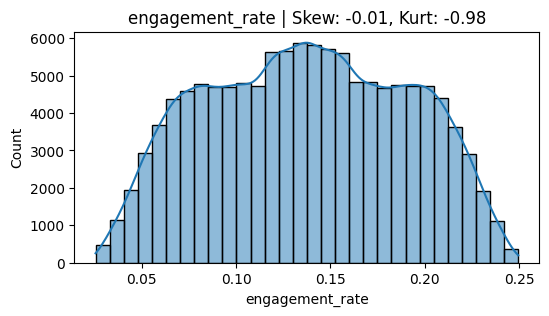

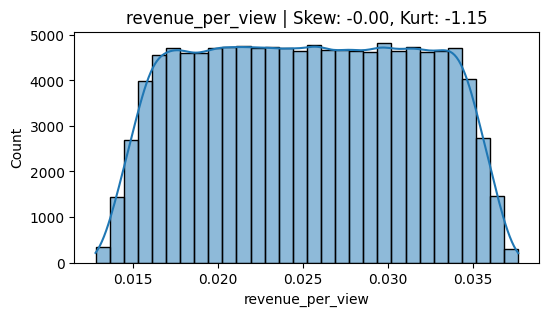

In [20]:
# Summary
df.describe()

# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Revenue by Category
plt.figure(figsize=(8,4))
sns.barplot(x='category', y='ad_revenue_usd', data=df)
plt.title("Average Revenue by Category")
plt.xticks(rotation=45)
plt.show()

# Revenue by Country
plt.figure(figsize=(8,4))
sns.barplot(x='country', y='ad_revenue_usd', data=df)
plt.title("Average Revenue by Country")
plt.show()

# Select numeric columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate skewness and kurtosis
skew_kurt = pd.DataFrame({
    "Skewness": df[num_cols].skew(),
    "Kurtosis": df[num_cols].kurt()
}).sort_values(by="Skewness", ascending=False)

print(skew_kurt)

for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"{col} | Skew: {df[col].skew():.2f}, Kurt: {df[col].kurt():.2f}")
    plt.show()



Preprocessing Setup

In [21]:
# Define target and features
X = df.drop(columns=["ad_revenue_usd", "video_id", "date","revenue_per_view"])
y = df["ad_revenue_usd"]

# Categorical & Numeric columns
categorical = ["category", "device", "country"]
numeric = [col for col in X.columns if col not in categorical]

# Preprocessor
preprocessor = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical),
    ("num", StandardScaler(), numeric)
])


Model Training & Evaluation

In [22]:
# Function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    return mae, rmse, r2

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.001),
    #"SVR": SVR(kernel='rbf',C=1.0,gamma="scale",cache_size=200),
    "Decision Tree": DecisionTreeRegressor(max_depth=10,random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=50,max_depth=10, random_state=42,n_jobs=-1),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=50,max_depth=3,random_state=42)
}

results = []

for name, model in models.items():
    start=time.time()
    pipe = Pipeline([
        ("preprocessor", preprocessor),
        ("model", model)
    ])
    mae, rmse, r2 = evaluate_model(pipe, X_train, X_test, y_train, y_test)
    duration=time.time()-start
    results.append([name, mae, rmse, r2,round(duration,2)])
    print(f"✅ {name:20s} | Time: {duration:6.2f}s | R²: {r2:.4f}")

# Results DataFrame
results_df = pd.DataFrame(results, columns=["Model", "MAE", "RMSE", "R²","Time(s)"])
results_df.sort_values(by="R²", ascending=False)


✅ Linear Regression    | Time:   0.27s | R²: 0.9526
✅ Ridge                | Time:   0.16s | R²: 0.9526
✅ Lasso                | Time:   0.37s | R²: 0.9526
✅ Decision Tree        | Time:   1.44s | R²: 0.9498
✅ Random Forest        | Time:   8.78s | R²: 0.9520
✅ Gradient Boosting    | Time:  23.10s | R²: 0.9518


,Model,MAE,RMSE,R²,Time(s)
2,Lasso,3.103786,13.479344,0.952579,0.37
1,Ridge,3.109480,13.480117,0.952573,0.16
0,Linear Regression,3.111783,13.480407,0.952571,0.27
4,Random Forest,3.690458,13.565722,0.951969,8.78
5,Gradient Boosting,4.067701,13.587183,0.951817,23.10
3,Decision Tree,4.230808,13.861805,0.949850,1.44


Selecting Best Model

In [23]:
best_model_name = results_df.loc[results_df['R²'].idxmax(), 'Model']
print("Best Model:", best_model_name)

# Refit best model
final_model = Pipeline([
    ("preprocessor", preprocessor),
    ("model", models[best_model_name])
])

final_model.fit(X_train, y_train)

# Save model
joblib.dump(final_model, "youtube_revenue_model.pkl")
print("✅ Model saved as youtube_revenue_model.pkl")


Best Model: Lasso
✅ Model saved as youtube_revenue_model.pkl


Feature Importance(Tree-based models only)

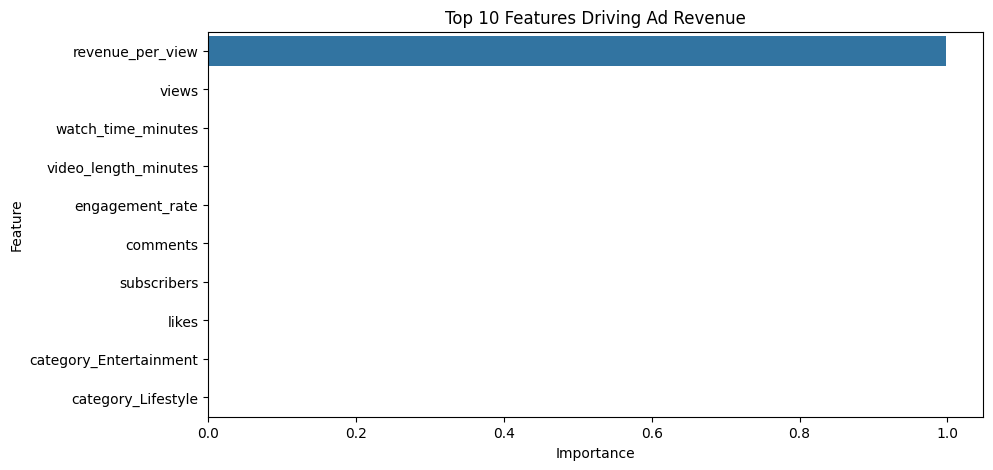

In [13]:
if best_model_name in ["Random Forest", "Gradient Boosting", "Decision Tree"]:
    model = final_model.named_steps["model"]
    ohe = final_model.named_steps["preprocessor"].named_transformers_["cat"]
    cat_features = ohe.get_feature_names_out(categorical)
    all_features = list(cat_features) + numeric

    importances = pd.DataFrame({
        "Feature": all_features,
        "Importance": model.feature_importances_
    }).sort_values(by="Importance", ascending=False)

    plt.figure(figsize=(10,5))
    sns.barplot(x="Importance", y="Feature", data=importances.head(10))
    plt.title("Top 10 Features Driving Ad Revenue")
    plt.show()

    importances.head(10)


### Key Insights
- 📊 Views and Watch Time have the strongest correlation with Revenue.
- 🌍 Geography and Category slightly influence CPM.
- 📱 Mobile users monetize better than TV/Desktop.
- 💡 Engagement Rate is a helpful secondary predictor.


In [14]:
df

,video_id,date,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,category,device,country,ad_revenue_usd,engagement_rate,revenue_per_view
0,vid_3092,2024-09-24 10:50:40.993199,9936,1221.0,320.0,26497.214184,2.862137,228086,Entertainment,TV,IN,203.178237,0.155093,0.020449
1,vid_3459,2024-09-22 10:50:40.993199,10017,642.0,346.0,15209.747445,23.738069,736015,Gaming,Tablet,CA,140.880508,0.098632,0.014064
2,vid_4784,2024-11-21 10:50:40.993199,10097,1979.0,187.0,57332.658498,26.200634,240534,Education,TV,CA,360.134008,0.214519,0.035667
3,vid_4078,2025-01-28 10:50:40.993199,10034,1191.0,242.0,31334.517771,11.770340,434482,Entertainment,Mobile,UK,224.638261,0.142814,0.022388
4,vid_3522,2025-04-28 10:50:40.993199,9889,1858.0,477.0,15665.666434,6.635854,42030,Education,Mobile,CA,165.514388,0.236121,0.016737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122395,vid_2902,2024-12-14 10:50:40.993199,9853,1673.0,147.0,42075.704885,25.490195,210818,Education,Tablet,US,280.986396,0.184715,0.028518
122396,vid_3890,2024-07-13 10:50:40.993199,10128,1709.0,63.0,57563.703040,16.229133,878860,Music,Desktop,UK,354.612981,0.174961,0.035013
122397,vid_3934,2024-06-10 10:50:40.993199,10267,700.0,274.0,27549.714659,23.822365,576756,Tech,Tablet,CA,203.643106,0.094867,0.019835
122398,vid_4260,2024-12-22 10:50:40.993199,10240,1616.0,106.0,56967.384382,7.753099,585138,Music,Mobile,UK,351.525811,0.168164,0.034329
